In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from utilities import lag_matrix
from torch.utils.tensorboard import SummaryWriter
from anarx import ANARX_TWO_v2

In [2]:
writer = SummaryWriter()
total_epochs = 0

In [3]:
a = ANARX_TWO_v2(20)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(a.parameters())



In [4]:
import scipy.io
mat = scipy.io.loadmat('data/miso_nosteps')
u1 = mat['u1_v']
u2 = mat['u2_v']
y = mat['y_v']

In [5]:
u1 = torch.squeeze(torch.from_numpy(u1))
u2 = torch.squeeze(torch.from_numpy(u2))
y = torch.squeeze(torch.from_numpy(y))
lagged_u1 = lag_matrix(u1, a.nlags)
lagged_u2 = lag_matrix(u2, a.nlags)


  0%|          | 0/1 [00:00<?, ?it/s]

Computing Loss
Computing Backward


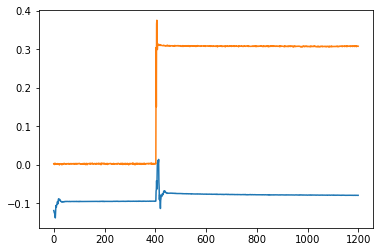

100%|██████████| 1/1 [00:06<00:00,  6.04s/it]


In [6]:
from tqdm import tqdm
for epoch in tqdm(range(1)):
    total_epochs = total_epochs + 1
    y_hat = torch.zeros_like(u1)
    optimizer.zero_grad()
    lags = a.initLags()
    # Predict whole Dataset
    for i in range(len(u1)):
        y_hat[i] = a(lagged_u1[i], lagged_u2[i], lags)
        lags = torch.roll(lags, 1, 0)
        lags[0] = y_hat[i]
    # Compute Loss and optimize
    print("Computing Loss")
    loss = criterion(y_hat, y)
    optimizer.zero_grad()
    print("Computing Backward")
    loss.backward(retain_graph=False)
    plt.plot(y_hat.detach().numpy())
    plt.plot(y)
    plt.show()
    writer.add_scalar('Loss/train', loss, total_epochs)
    optimizer.step()

In [7]:
# torch.save(a, "anarxreal.pt")